# Prior knowledge

- Linear Model
- Hold-Out
- Scatterplots and Boxplots
- Correlation
- R2


http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
df = sns.load_dataset("mpg")
df = df.sample(frac=1, random_state=595).reset_index(drop=1)

In [3]:
limit = round(len(df) * 0.8)
df["holdout"] = "train"
df.loc[limit:,"holdout"] = "test"

In [4]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  25.5          4         122.0        96.0    2300          15.5   
1  43.1          4          90.0        48.0    1985          21.5   
2  25.0          4         113.0        95.0    2228          14.0   
3  33.5          4         151.0        90.0    2556          13.2   
4  29.0          4          97.0        78.0    1940          14.5   

   model_year  origin                             name holdout  
0          77     usa                plymouth arrow gs   train  
1          78  europe  volkswagen rabbit custom diesel   train  
2          71   japan                    toyota corona   train  
3          79     usa                  pontiac phoenix   train  
4          77  europe         volkswagen rabbit custom   train

In [5]:
holdout = df["holdout"]
df = df.drop("holdout", axis=1)

# Define the target

In [6]:
target = df["mpg"]
df = df.drop(["mpg"], axis=1)

# Exploratory Data Analysis

## correlated features

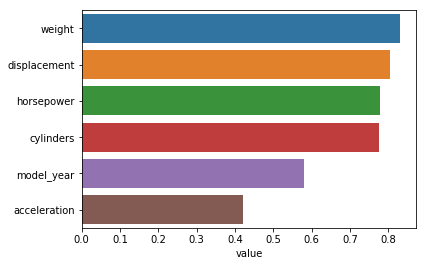

## scatterplots

In [8]:
# scatterplot 
#df["displacement"]
#target

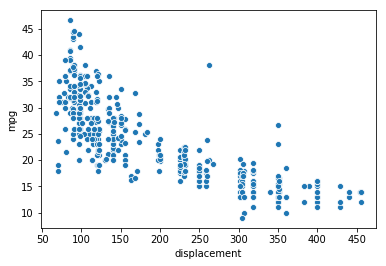

In [10]:
#scatterplot
#df["horsepower"]
#target

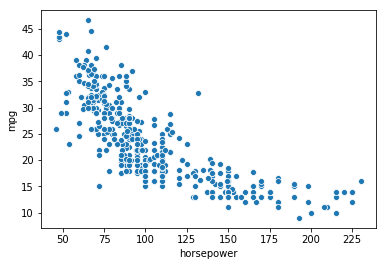

In [12]:
#scatterplot
#df["weight"]
#target

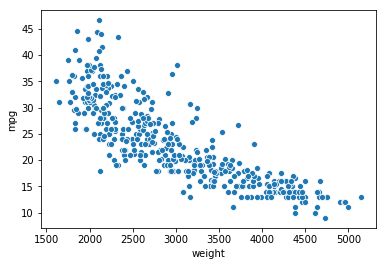

In [14]:
#scatterplot
#df["acceleration"]
#target

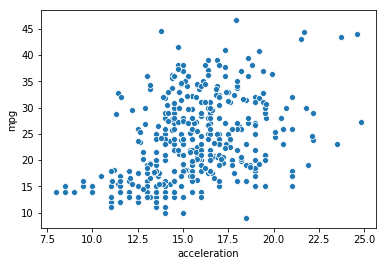

In [16]:
#boxplot
#df["origin"]
#target

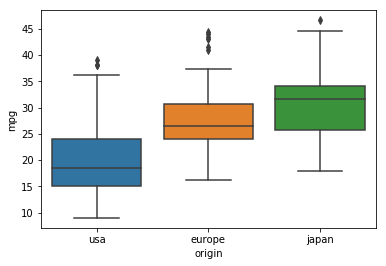

In [18]:
#boxplot
#df["model_year"]
#target

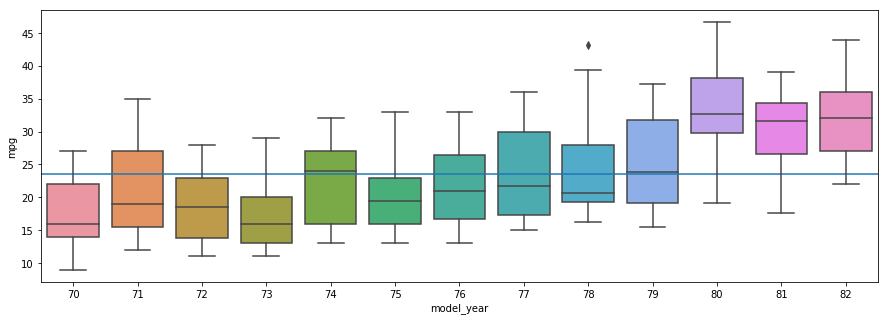

In [20]:
#boxplot
#df["cylinders"]
#target

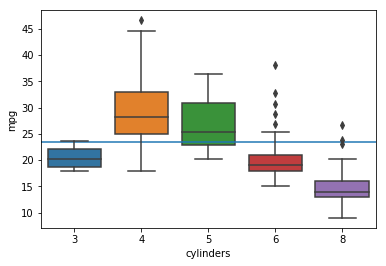

# Data Prep

## create dummies

## select numeric features only

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8', 'bool']
df_features = df.select_dtypes(include=numerics)
df_features.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          4         122.0        96.0    2300          15.5          77   
1          4          90.0        48.0    1985          21.5          78   
2          4         113.0        95.0    2228          14.0          71   
3          4         151.0        90.0    2556          13.2          79   
4          4          97.0        78.0    1940          14.5          77   

   dummy_origin_usa  dummy_year_gt_80  dummy_cylinders_4  dummy_cylinders_5  \
0              True             False               True              False   
1             False             False               True              False   
2             False             False               True              False   
3              True             False               True              False   
4             False             False               True              False   

   dummy_acceleration  
0               False  
1               False  
2               False  
3               False  
4               False

## nan treatment

## create polynomial features

In [25]:
from sklearn.preprocessing import PolynomialFeatures
#...

In [26]:
df_poly_features.head()

0     1       2       3         4          5
0  1.0  96.0  2300.0  9216.0  220800.0  5290000.0
1  1.0  48.0  1985.0  2304.0   95280.0  3940225.0
2  1.0  95.0  2228.0  9025.0  211660.0  4963984.0
3  1.0  90.0  2556.0  8100.0  230040.0  6533136.0
4  1.0  78.0  1940.0  6084.0  151320.0  3763600.0

In [27]:
df_features = df_features.drop(["horsepower", "weight"], axis=1)
df_features = pd.concat([df_features.reset_index(drop=True), df_poly_features], axis=1)
df_features.head()

cylinders  displacement  acceleration  model_year  dummy_origin_usa  \
0          4         122.0          15.5          77              True   
1          4          90.0          21.5          78             False   
2          4         113.0          14.0          71             False   
3          4         151.0          13.2          79              True   
4          4          97.0          14.5          77             False   

   dummy_year_gt_80  dummy_cylinders_4  dummy_cylinders_5  dummy_acceleration  \
0             False               True              False               False   
1             False               True              False               False   
2             False               True              False               False   
3             False               True              False               False   
4             False               True              False               False   

     0     1       2       3         4          5  
0  1.0  96.0  2300.0  9216.0  220800.0  5290000.0  
1  1.0  48.0  1985.0  2304.0   95280.0  3940225.0  
2  1.0  95.0  2228.0  9025.0  211660.0  4963984.0  
3  1.0  90.0  2556.0  8100.0  230040.0  6533136.0  
4  1.0  78.0  1940.0  6084.0  151320.0  3763600.0

## correlated features

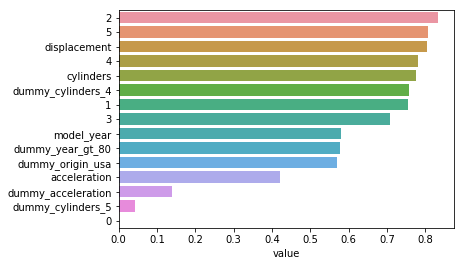

## drop irrelevant features

In [29]:
drop_columns = df_corr[df_corr["value"] < 0.5].index.values
print(drop_columns)

['acceleration' 'dummy_acceleration' 'dummy_cylinders_5']


In [30]:
df_filtered_features = df_features
df_filtered_features = df_filtered_features.drop(drop_columns, axis=1)

In [31]:
df_filtered_features.head()

cylinders  displacement  model_year  dummy_origin_usa  dummy_year_gt_80  \
0          4         122.0          77              True             False   
1          4          90.0          78             False             False   
2          4         113.0          71             False             False   
3          4         151.0          79              True             False   
4          4          97.0          77             False             False   

   dummy_cylinders_4    0     1       2       3         4          5  
0               True  1.0  96.0  2300.0  9216.0  220800.0  5290000.0  
1               True  1.0  48.0  1985.0  2304.0   95280.0  3940225.0  
2               True  1.0  95.0  2228.0  9025.0  211660.0  4963984.0  
3               True  1.0  90.0  2556.0  8100.0  230040.0  6533136.0  
4               True  1.0  78.0  1940.0  6084.0  151320.0  3763600.0

## split train and test

# Modeling Linear

## prepare model

In [33]:
from sklearn.linear_model import LinearRegression

### train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### test

## evaluate model

In [36]:
from sklearn.metrics import mean_squared_error

MSE: 8.48484888743951


# Modeling Tree

## prepare model

In [38]:
from sklearn.tree import DecisionTreeRegressor

### train

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### test

## evaluate model

In [41]:
from sklearn.metrics import mean_squared_error

MSE: 14.91875
